In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("sensor_data.csv")

In [36]:
tmp_x = data.iloc[:, :-1]

In [37]:
scaler = MinMaxScaler()
scaler.fit(tmp_x)
# scaler.data_max_
x = scaler.transform(tmp_x)

In [38]:
y = np.array(data.iloc[:, -1])

In [39]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size = 0.3)

In [40]:
model = Sequential()

model.add(Dense(128, input_shape=(2,), kernel_initializer='normal', activation='relu'))

model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = model.fit(x_trn, y_trn, epochs=50, batch_size = 10,  verbose=1, validation_split=0.2)


Epoch 1/50
11/11 [==============================] - 1s 19ms/step - loss: 1788.1462 - mse: 1788.1462 - mae: 24.1059 - val_loss: 3073.4001 - val_mse: 3073.4001 - val_mae: 40.9662
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 1749.5643 - mse: 1749.5643 - mae: 24.2918 - val_loss: 2926.4519 - val_mse: 2926.4519 - val_mae: 40.5667
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 1612.9705 - mse: 1612.9705 - mae: 25.0110 - val_loss: 2487.5530 - val_mse: 2487.5530 - val_mae: 39.2544
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 1311.2544 - mse: 1311.2544 - mae: 26.5988 - val_loss: 1697.1951 - val_mse: 1697.1948 - val_mae: 36.0310
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 1077.1859 - mse: 1077.1859 - mae: 29.6396 - val_loss: 1273.9335 - val_mse: 1273.9335 - val_mae: 33.5588
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 999.5839 - mse: 999.5839 - mae: 28.9892 - val_l

11/11 [==============================] - 0s 5ms/step - loss: 383.5740 - mse: 383.5740 - mae: 11.8770 - val_loss: 310.2518 - val_mse: 310.2518 - val_mae: 12.7098
Epoch 49/50
11/11 [==============================] - 0s 5ms/step - loss: 401.1989 - mse: 401.1989 - mae: 13.1893 - val_loss: 412.6237 - val_mse: 412.6237 - val_mae: 15.7062
Epoch 50/50
11/11 [==============================] - 0s 5ms/step - loss: 376.8376 - mse: 376.8376 - mae: 12.6715 - val_loss: 292.4760 - val_mse: 292.4760 - val_mae: 11.8480


In [41]:
predictions = model.predict(x_tst)

In [42]:
y_tst = np.array(y_tst).reshape(56,1)

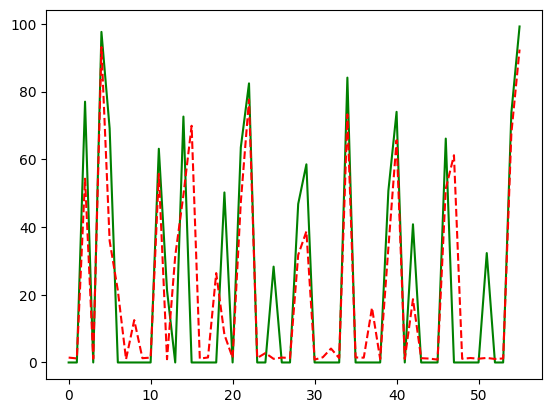

In [43]:
plt.plot(np.arange(y_tst.size), y_tst, color = "green")
plt.plot(np.arange(predictions.size), predictions, linestyle='dashed', color = "red")
plt.show()

In [44]:
model.save("iot_pred.model")

INFO:tensorflow:Assets written to: iot_pred.model\assets


In [45]:
loaded_model = tf.keras.models.load_model("iot_pred.model")

In [46]:
testData = np.hstack((x_tst, y_tst))
np.savetxt('test_data.txt', testData)